In [1]:
import pandas as pd

df = pd.read_csv("sukkiri-ml2-codes/datafiles/bike.tsv",sep="\t")
weather = pd.read_csv("sukkiri-ml2-codes/datafiles/weather.csv", encoding="shift-jis")
temp = pd.read_json("sukkiri-ml2-codes/datafiles/temp.json").T


In [2]:
temp.head()

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869


In [3]:
df2 = df.merge(weather, how="inner", on="weather_id")
df3 = df2.merge(temp, how="left", on="dteday")

In [42]:
from sklearn.covariance import MinCovDet

df4 = df3.loc[:, "atemp":].dropna().reset_index()
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(df4)

distance = mcd.mahalanobis(df4)
distance = pd.Series(distance)
tmp = distance.describe()

# Calculate IQR and bounds
iqr = tmp["75%"] - tmp["25%"]
max_d = 1.5*(iqr) + tmp["75%"]
min_d = tmp["75%"] - 1.5*(iqr) 
outline = distance[(distance<min_d) | (max_d<distance)]


In [44]:
# Drop only the existing indices
df5 = df4.drop(outline.index)

# Optional: Print to verify
#print("Indices being dropped:", indices_to_drop)
#print("Shape of new dataframe:", df5.shape)

<Axes: xlabel='atemp', ylabel='hum'>

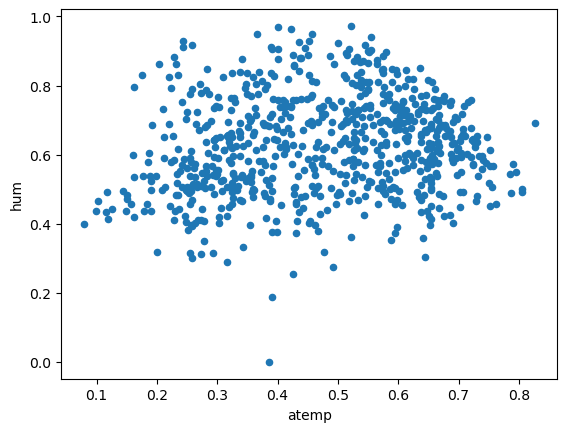

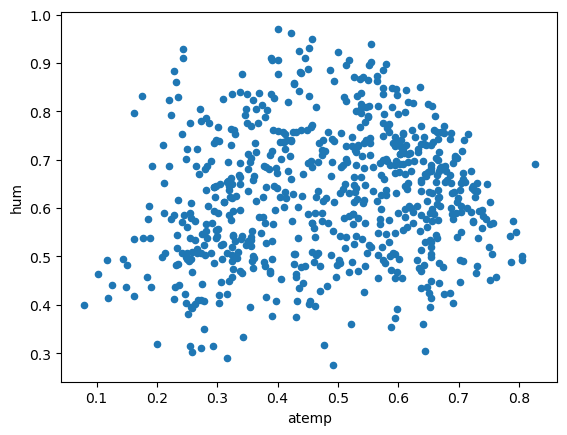

In [6]:
import matplotlib.pyplot as plot
df4.plot(kind="scatter", x="atemp",y="hum")
df5.plot(kind="scatter", x="atemp",y="hum")